<a href="https://colab.research.google.com/github/VSY1111/finmars/blob/main/Ivan_final_task%20051025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тетрадь с заданиями по Portfolio Allocation (интервью)

**Дата:** 2025-09-29

Эта тетрадь содержит набор практических заданий по темам аллокации портфеля.
Цель — оценить ваши навыки в Python, работе с данными, статистике и оптимизации.

**Правила:**  
- Пишите код в отмеченных ячейках `# === ВАШ КОД ЗДЕСЬ ===` и не меняйте сигнатуры функций, где это явно указано.  
- Разрешено использовать стандартный стек: `numpy`, `pandas`, `matplotlib`, а также по возможности `scipy`, `cvxpy`. Если библиотек нет — реализуйте численные методы самостоятельно.
- Там, где есть автопроверки `assert`, не удаляйте их — используйте как минимальные юнит-тесты.  
- Если вы делаете упрощения или меняете постановку — кратко объясните это в Markdown.

**Содержание:**
0. Подготовка данных: цены → доходности, базовые метрики  
1. Доходности и метрики
2. Марковиц + остальное
3. Ограничения
4. Риск-паритет
5. Регуляризация ковариаций
6. CVaR-оптимизация на исторических сценариях  
7. Финальное задание
Удачи!


## 0. Подготовка окружения и данных

Запустите ячейки ниже, чтобы получить синтетические данные цен и факторов. При желании можете заменить их на свои (например, загрузить CSV).


[Параметры] n_assets=200, years=5, days=1260, rho=0.45, end_date=2024-12-31
mu_annual: [0.03   0.0305 0.0309 0.0314 0.0318 0.0323 0.0327 0.0332 0.0336 0.0341
 0.0345 0.035  0.0354 0.0359 0.0363 0.0368 0.0372 0.0377 0.0381 0.0386
 0.039  0.0395 0.0399 0.0404 0.0409 0.0413 0.0418 0.0422 0.0427 0.0431
 0.0436 0.044  0.0445 0.0449 0.0454 0.0458 0.0463 0.0467 0.0472 0.0476
 0.0481 0.0485 0.049  0.0494 0.0499 0.0504 0.0508 0.0513 0.0517 0.0522
 0.0526 0.0531 0.0535 0.054  0.0544 0.0549 0.0553 0.0558 0.0562 0.0567
 0.0571 0.0576 0.058  0.0585 0.0589 0.0594 0.0598 0.0603 0.0608 0.0612
 0.0617 0.0621 0.0626 0.063  0.0635 0.0639 0.0644 0.0648 0.0653 0.0657
 0.0662 0.0666 0.0671 0.0675 0.068  0.0684 0.0689 0.0693 0.0698 0.0703
 0.0707 0.0712 0.0716 0.0721 0.0725 0.073  0.0734 0.0739 0.0743 0.0748
 0.0752 0.0757 0.0761 0.0766 0.077  0.0775 0.0779 0.0784 0.0788 0.0793
 0.0797 0.0802 0.0807 0.0811 0.0816 0.082  0.0825 0.0829 0.0834 0.0838
 0.0843 0.0847 0.0852 0.0856 0.0861 0.0865 0.087  0.0874 0.08

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A191,A192,A193,A194,A195,A196,A197,A198,A199,A200
2020-03-04,100.250051,100.084219,100.248241,99.733647,100.121368,99.553733,100.022798,99.734457,99.795029,100.523631,...,100.521681,101.701358,100.467726,102.477402,100.748193,98.760104,100.914525,100.597141,101.383837,100.854229
2020-03-05,100.201420,99.655872,100.173865,99.432359,99.913098,99.763509,100.626707,99.876999,99.355508,100.687801,...,100.998628,101.967157,100.619141,102.155065,101.024764,98.496317,101.045924,101.723749,100.487872,101.835265
2020-03-06,100.729015,99.686100,99.499357,99.292058,100.451146,99.832078,100.341349,99.772667,99.742812,100.974392,...,100.778820,103.832032,99.932467,103.291757,102.222848,98.259738,102.592154,101.846937,101.077767,102.410188
2020-03-09,100.832206,100.119683,99.931094,98.833599,101.080224,99.398750,100.883703,100.351831,99.515077,100.998020,...,102.191590,103.807674,100.086793,103.763858,101.783424,98.279574,102.915752,103.354185,102.044863,103.332560
2020-03-10,101.120222,100.062248,100.058671,98.787668,101.165704,99.180166,99.981985,100.291765,100.024135,101.332634,...,102.024983,105.075732,98.799202,103.694785,100.638402,98.529591,103.640514,102.920599,99.691308,103.450951


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A191,A192,A193,A194,A195,A196,A197,A198,A199,A200
2020-03-04,0.002501,0.000842,0.002482,-0.002664,0.001214,-0.004463,0.000228,-0.002655,-0.002050,0.005236,...,0.005217,0.017014,0.004677,0.024774,0.007482,-0.012399,0.009145,0.005971,0.013838,0.008542
2020-03-05,-0.000485,-0.004280,-0.000742,-0.003021,-0.002080,0.002107,0.006038,0.001429,-0.004404,0.001633,...,0.004745,0.002614,0.001507,-0.003145,0.002745,-0.002671,0.001302,0.011199,-0.008837,0.009727
2020-03-06,0.005265,0.000303,-0.006733,-0.001411,0.005385,0.000687,-0.002836,-0.001045,0.003898,0.002846,...,-0.002176,0.018289,-0.006824,0.011127,0.011859,-0.002402,0.015302,0.001211,0.005870,0.005646
2020-03-09,0.001024,0.004349,0.004339,-0.004617,0.006263,-0.004341,0.005405,0.005805,-0.002283,0.000234,...,0.014019,-0.000235,0.001544,0.004571,-0.004299,0.000202,0.003154,0.014799,0.009568,0.009007
2020-03-10,0.002856,-0.000574,0.001277,-0.000465,0.000846,-0.002199,-0.008938,-0.000599,0.005115,0.003313,...,-0.001630,0.012215,-0.012865,-0.000666,-0.011250,0.002544,0.007042,-0.004195,-0.023064,0.001146


Сформировано: 200 активов, 1260 торговых дней.


,MKT,SMB,HML
2020-03-04,0.005631,-0.002145,-0.001956
2020-03-05,0.001064,-0.002283,-0.001766
2020-03-06,0.004449,0.001972,0.000533
2020-03-09,0.016120,0.000247,-0.004944
2020-03-10,-0.003115,-0.000095,0.002659


Mean daily: {'A1': 0.00032, 'A2': 0.000295, 'A3': 0.000259, 'A4': -3e-06, 'A5': 0.000128, 'A6': 0.000209, 'A7': 0.000107, 'A8': 0.000259, 'A9': 0.000139, 'A10': 0.00026, 'A11': 0.000136, 'A12': 0.000198, 'A13': 0.000203, 'A14': 0.00011, 'A15': 9.5e-05, 'A16': 0.000249, 'A17': 9.5e-05, 'A18': 0.000278, 'A19': 5.2e-05, 'A20': 0.000308, 'A21': 0.000111, 'A22': 0.000247, 'A23': 0.000223, 'A24': 0.00037, 'A25': 0.000183, 'A26': 0.000265, 'A27': 0.000246, 'A28': 0.000412, 'A29': 3.1e-05, 'A30': 0.000275, 'A31': -4.2e-05, 'A32': 0.000349, 'A33': 8.3e-05, 'A34': 0.000212, 'A35': 0.000308, 'A36': 0.000395, 'A37': 0.000346, 'A38': 0.000115, 'A39': 0.000388, 'A40': 0.000258, 'A41': 0.000362, 'A42': 6.6e-05, 'A43': 6.8e-05, 'A44': 0.000258, 'A45': 0.000235, 'A46': 0.000303, 'A47': 0.000247, 'A48': 0.000268, 'A49': 0.00045, 'A50': 0.000328, 'A51': 0.000518, 'A52': 0.00046, 'A53': 0.000458, 'A54': 0.000102, 'A55': 0.000196, 'A56': 0.000248, 'A57': 0.000584, 'A58': -5.9e-05, 'A59': 0.000113, 'A60': 0

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A191,A192,A193,A194,A195,A196,A197,A198,A199,A200
A1,1.000000,0.104886,0.073257,0.073551,0.075454,0.053969,0.058215,0.080681,0.093944,0.112303,...,0.080035,0.136149,0.082735,0.142482,0.074127,0.140314,0.138454,0.132376,0.084764,0.121637
A2,0.104886,1.000000,0.044624,0.051290,0.081877,0.044718,0.078504,0.030423,0.088005,0.079104,...,0.113244,0.062156,0.081403,0.089230,0.116392,0.099400,0.108577,0.120714,0.133352,0.094454
A3,0.073257,0.044624,1.000000,0.079581,0.085056,0.053101,0.074350,0.121367,0.094067,0.079360,...,0.123995,0.170321,0.145375,0.140679,0.107445,0.139460,0.153347,0.108252,0.138292,0.097751
A4,0.073551,0.051290,0.079581,1.000000,0.151004,0.032532,0.033051,0.115833,0.094998,0.058694,...,0.132945,0.124397,0.170674,0.143768,0.110679,0.104802,0.159063,0.158739,0.092554,0.151013
A5,0.075454,0.081877,0.085056,0.151004,1.000000,0.108360,0.041403,0.093676,0.107231,0.095732,...,0.176086,0.060439,0.119416,0.115626,0.092655,0.143732,0.125559,0.110220,0.105432,0.144210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A196,0.140314,0.099400,0.139460,0.104802,0.143732,0.073520,0.117445,0.095910,0.175134,0.116570,...,0.214689,0.193637,0.183717,0.198752,0.191921,1.000000,0.205561,0.265167,0.246928,0.189139
A197,0.138454,0.108577,0.153347,0.159063,0.125559,0.119465,0.104723,0.113079,0.127336,0.142033,...,0.248844,0.197672,0.237748,0.250511,0.193274,0.205561,1.000000,0.242760,0.222696,0.224117
A198,0.132376,0.120714,0.108252,0.158739,0.110220,0.079691,0.110018,0.135693,0.148723,0.063139,...,0.238802,0.213784,0.203704,0.250765,0.247800,0.265167,0.242760,1.000000,0.230029,0.227061
A199,0.084764,0.133352,0.138292,0.092554,0.105432,0.085351,0.151226,0.120760,0.117602,0.100284,...,0.197975,0.177100,0.188962,0.219931,0.174772,0.246928,0.222696,0.230029,1.000000,0.183826


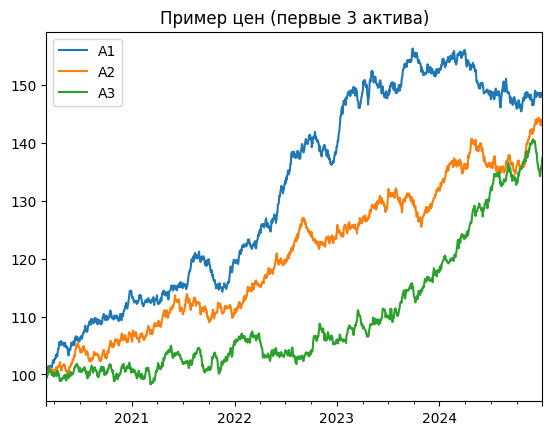

In [10]:
from datetime import datetime
# =========================
# БАЗА: генерация синтетических данных (portfolio allocation)
# Кандидат ДОЛЖЕН сам задать все важные временные переменные и параметры генерации.
# =========================

# === ЗАДАНИЕ 0: Импорт и seed ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #используется для графиков

# TODO: задайте seed (объясните в тексте ниже, зачем это нужно)
seed = 42
np.random.seed(seed)

# === ЗАДАНИЕ 1: Временные параметры ===
# TODO: Задайте самостоятельно:
# - n_assets: число активов (хотя бы 100)
# - years: число лет истории ИЛИ вместо этого укажите start_date / end_date
# - trading_days_per_year: число торговых дней в году (252 по умолчанию)
# - end_date: дата окончания ряда (если используете years)
# - rho: уровень общей корреляции (0..1)
#n_assets = ...                 # TODO
#years = ...                    # TODO (или задайте start_date/end_date)
#trading_days_per_year = ...  # TODO
#rho = ...                   # TODO


##
# === МОЙ КОД ЗДЕСЬ ===
n_assets = 200      # Количество активов в портфеле
years = 5         # 5 лет истории для достаточной статистики
# start_date = datetime(2010, 1, 1)   # выбрал задавать years
# end_date = datetime(2014, 12, 31)
trading_days_per_year = 252   # Стандартное количество торговых дней
rho = 0.45                     # Умеренно повышенный уровень корреляции между активами
##


# Диапазоны годовых средних доходностей и волатильностей (можно менять)
mu_min, mu_max = 0.03, 0.12   # 3%..12% годовых
vol_min, vol_max = 0.10, 0.25 # 10%..25% годовых - доходность не менял от изначального

# === ЗАДАНИЕ 2: Построить индекс дат ===
# Вариант A (через years):
#end_date = ...  # TODO: можно задать конкретную дату строкой '2024-12-31'
#trading_days = ...
#dates = ...

##
# === МОЙ КОД ЗДЕСЬ ===
end_date = pd.Timestamp('2024-12-31')  # последний день декабря - формат дат из библиотеки пандас
trading_days = years * trading_days_per_year
dates = pd.bdate_range(end=end_date, periods=trading_days, freq='B')
# freq='B' B - значит берутся чисто бизнес дни
##

# Мини-проверки
assert n_assets >= 2, "n_assets должно быть >= 2"
assert trading_days > 100, "слишком короткий ряд — увеличьте years или период"
assert 0 <= rho < 1, "rho должно быть в [0,1)"
print(f"[Параметры] n_assets={n_assets}, years={years}, days={trading_days}, rho={rho}, end_date={end_date.date()}")
# f возможность в фигурных скобках отобразать параметры
# === ЗАДАНИЕ 3: Сгенерировать годовые профили доходностей и волатильностей ===
# Пример: линейные сетки по активам (можно сделать случайно, но объясните выбор)
mu_annual = np.linspace(mu_min, mu_max, n_assets)
vol_annual = np.linspace(vol_min, vol_max, n_assets)

##
# МОЙ КОД ЗДЕСЬ
# mu_annual = np.concatenate([np.random.normal(0.05, 0.01, n_assets//2), np.random.normal(0.09, 0.015, n_assets//2)])
# vol_annual = mu_annual * 2 + np.random.normal(0.05, 0.02, n_assets)  # корреляция с доходностью
#mu_annual, vol_annual = np.clip(mu_annual, 0.03, 0.12), np.clip(vol_annual, 0.10, 0.25) #np.clip выбросы втягивает на диапазон
# объяснение по открытой ссылке: https://docs.google.com/document/d/11cjTT4McR-HlquTBq1x2UCIpjdmybOB_5-uEBbgdSGQ/edit?tab=t.0#heading=h.q4l9omhn34tn
# а) два типа акций (рост и стабильные) б)коррреляция риска и доходности в) тяжелые хвосты что ближе к реальным данным и соблюдение гранин
# вопрос не рано ли я такую сложную модель сделал. так как в заданиях 4 5 это нужно сделать
##

# Перевод в дневные параметры
mu_daily = mu_annual / trading_days_per_year
vol_daily = vol_annual / np.sqrt(trading_days_per_year)

print("mu_annual:", np.round(mu_annual, 4))
print("vol_annual:", np.round(vol_annual, 4))

# === ЗАДАНИЕ 4: Сгенерировать фактор, беты и шумы ===
# Модель (упрощенно):
# r_t = mu_daily + rho * f_t * beta + (1 - rho) * eps_t
# где f_t — общий фактор, beta — чувствительность актива к фактору, eps_t — idiosyncratic шум
f = np.random.normal(0, 0.01, size=trading_days)            # общий фактор из numpy матожидание дисперсия и количество параметров
betas = np.linspace(0.2, 1.0, n_assets)                     # чувствительности к фактору (можно выбрать иначе)

# Индивидуальные шумы. Важно: масштаб под дневную волатильность каждого актива
eps = np.random.normal(0, 1, size=(trading_days, n_assets)) * vol_daily # матрица коэфициента случайных шумов на дневную волатильность

# Факторная часть
factor_part = np.outer(f, betas)  #матрица систематической компоненты

# Итоговые доходности (псевдо лог-доходности как приближение)
rets_arr = (mu_daily + rho * factor_part) + (1 - rho) * eps  #rho - это греческая РО ))
rets = pd.DataFrame(rets_arr, index=dates, columns=[f"A{i+1}" for i in range(n_assets)])
# print(f"ваня {rets}")

# === ЗАДАНИЕ 5: Получить цены из доходностей ===
# Стартовая цена 100 для всех активов
prices = 100 * (1 + rets).cumprod() # cumprod() перемножает прошлое значение со следующим множителем создает вектор цен по каждому дню

# Мини-проверки размеров
assert rets.shape == (trading_days, n_assets)
assert prices.shape == (trading_days, n_assets)

display(prices.head())   # Head с пустыми скобками показывает первые 5 строк таблицы
display(rets.head())
print(f"Сформировано: {n_assets} активов, {trading_days} торговых дней.")

# === ЗАДАНИЕ 6: Синтетические факторы для дальнейших задач (например, факторная регрессия) ===
# Можно использовать f как основу для MKT + добавить шум. Остальные факторы — независимые.
factors = pd.DataFrame({
    "MKT": f + np.random.normal(0, 0.002, size=trading_days),  #Np. берет из Библиотеки NumPy
    "SMB": np.random.normal(0, 0.003, size=trading_days),
    "HML": np.random.normal(0, 0.003, size=trading_days),
}, index=dates)                                                # рост заложен в rets а факторы с матожиданием 0 хотя акции растут и но тут упрощенная модель

display(factors.head())

# === ЗАДАНИЕ 7: Быстрые sanity-checks и визуализации ===
# 1) Базовые статистики по дневным доходностям
print("Mean daily:", rets.mean().round(6).to_dict())    # rets.mean() - вычисляет для каждой акции среднее для каждого столбца
print("Std  daily:", rets.std().round(6).to_dict())

# 2) Корреляции — ожидаем, что они не нулевые (из-за общего фактора)
corr = rets.corr()   #вычисление ковариационной матрицы
display(corr)

# 3) Простейший график цен 2–3 активов
prices.iloc[:, :3].plot(title="Пример цен (первые 3 актива)"); plt.show()  #iloc : - все :3 c нулевого по второй

# 4) Простая проверка «не нулевости» корреляций (эвристика)
non_diag = corr.values[np.triu_indices_from(corr.values, k=1)]   #triu - верхний треугольник
assert (np.abs(non_diag) > 0).mean() > 0.3, "Корреляции выглядят слишком низкими — проверьте модель и параметры."

## 1) Доходности и базовые метрики
Реализуйте `simple_returns`, `log_returns`, `annualized_mean_vol_cov`.


In [11]:
# === МОЙ КОД ЗДЕСЬ ===
def simple_returns(prices: pd.DataFrame) -> pd.DataFrame:
    # TODO: реализуйте
        #Вычисляет простые доходности: (P_t / P_{t-1}) - 1

    return prices.pct_change().dropna() # процентное изменением между предыдущей и следующей строкой
                                            # dropna - исключает несуществующие строки
def log_returns(prices: pd.DataFrame) -> pd.DataFrame:
    # TODO: реализуйте
        #Вычисляет логарифмические доходности: ln(P_t / P_{t-1})
    return np.log(prices / prices.shift(1)).dropna()  #.shift(1) сдвиг на 1 вниз - и делим цену актива сам на себя в прошлый день


def annualized_mean_vol_cov(returns: pd.DataFrame, periods: int=252):
    # TODO: реализуйте
    """ Вычисляет аннуализированные среднее, волатильность и ковариационную матрицу
Args:
        returns: DataFrame с доходностями
        periods: количество периодов в году (252 для дневных данных)

    Returns:
        mu: аннуализированные средние доходности
        vol: аннуализированные волатильности
        cov: аннуализированная ковариационная матрица
    """
   ### mu = ...
   ### vol = ...
   ### cov = ...
   ### return mu, vol, cov

    # Средняя доходность за период
    mean_ret = returns.mean()

    # Аннуализация
    mu = mean_ret * periods
    ##print(mu) ### test

    # Ковариационная матрица за период
    cov_period = returns.cov()

    # Аннуализация ковариационной матрицы
    cov = cov_period * periods
    ##print(cov)  ###test

    # Волатильности (диагональные элементы ковариационной матрицы)
    vol = np.sqrt(np.diag(cov))
    ##print(vol) ### test

    vol = pd.Series(vol, index=returns.columns)
    ##print(vol) ### test

    return mu, vol, cov

# Мини‑тесты
_sr = simple_returns(prices)
_lr = log_returns(prices)
mu_a, vol_a, cov_a = annualized_mean_vol_cov(_sr)

assert _sr.shape == _lr.shape
## проверка print ("fhfghfgdfgjdgfdjg", (_lr+1).prod() - 1, (1+_sr).prod() - 1)
# Исправленный тест: сравниваем экспоненту суммы лог-доходностей с произведением (1+простых доходностей)
# заменяю/ эту проверну на см ниже assert np.allclose((_lr+1).prod() - 1, (1+_sr).prod() - 1, atol=1e-2)  # итоговая доходность близка
#Заменяю функцию проверки так так simple returns - 1 равен логарифм минус 1 только при малых значениях, а тут годовая доходность заменяем на
assert np.allclose(np.exp(_lr.sum()), (1+_sr).prod(), atol=1e-6)  # итоговая доходность близка
# комментарий - оно должно совпасть до машинной точности так как это отножение цены актива в конце года на начало ))
assert cov_a.shape[0] == cov_a.shape[1] == _sr.shape[1] # Проверяем, что размер ковариационной матрицы совпадает с числом активов

print('OK: метрики посчитаны')

OK: метрики посчитаны


## 2) Марковиц: GMV и эффективная граница (без шортов)
Аналитические решения GMV и портфеля с заданной доходностью. Постройте границу.


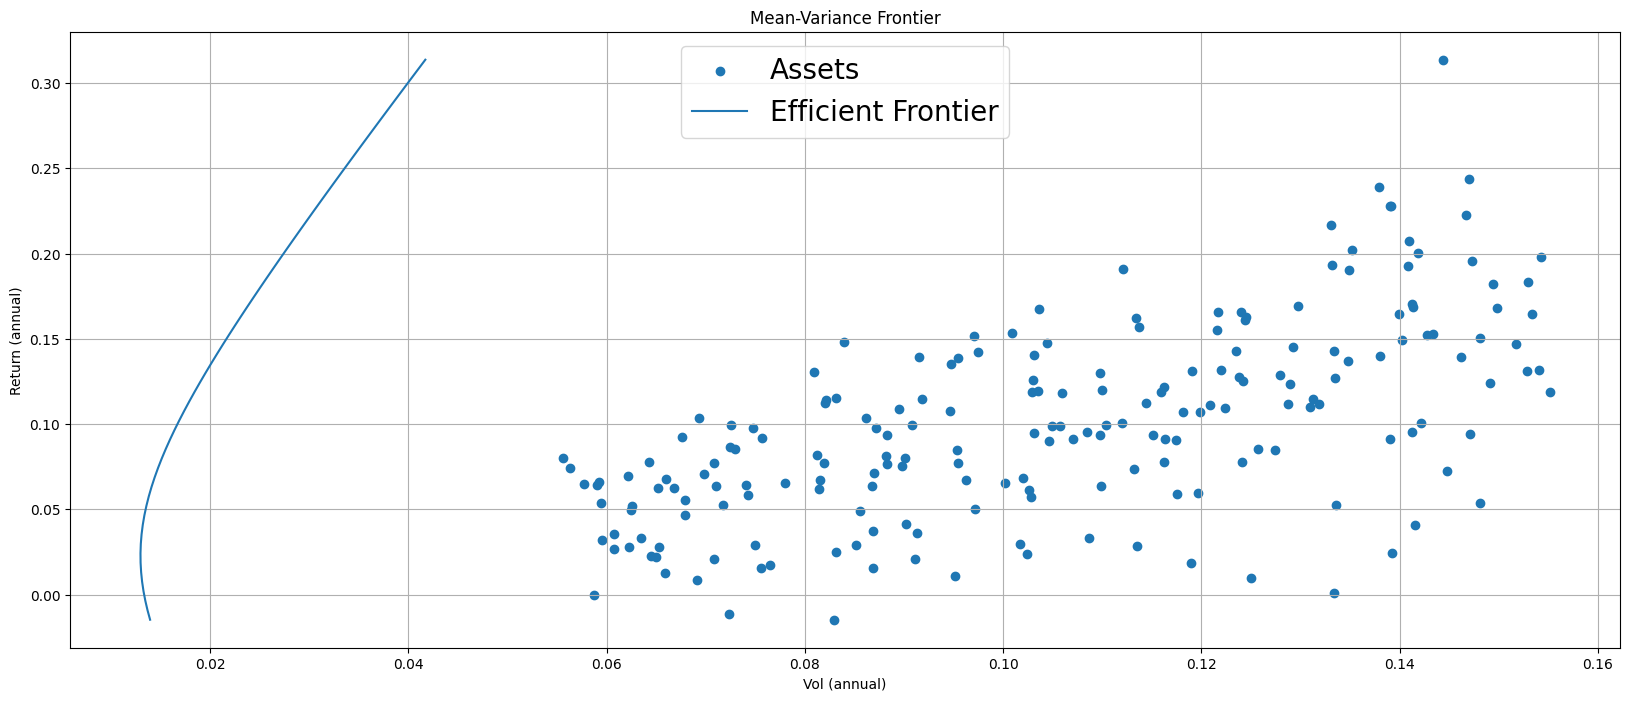

In [15]:
def gmv_weights(cov: pd.DataFrame) -> pd.Series:
    # TODO: должно возвращать веса
    """
    Глобально минимальная дисперсия портфеля (GMV)
    Минимизируем w^T * Cov * w при ограничении sum(w) = 1

    Аналитическое решение: w = (Cov^{-1} * 1) / (1^T * Cov^{-1} * 1)
    """
    # Обратная ковариационная матрица
    cov_inv = np.linalg.inv(cov.values)

    # Вектор единиц
    ones = np.ones((len(cov), 1))

    # Аналитическое решение GMV
    numerator = cov_inv @ ones
    denominator = ones.T @ cov_inv @ ones
    w = numerator / denominator

    ###
    return pd.Series(w.flatten(), index=cov.columns)

def mean_variance_weights(cov: pd.DataFrame, mu: pd.Series, target_ret: float) -> pd.Series:
    # TODO: должно возвращать веса
    """
    Портфель с заданной целевой доходностью (классический Марковиц)

    Минимизируем w^T * Cov * w
    при ограничениях:
    - sum(w) = 1
    - w^T * mu = target_ret

    Аналитическое решение через множители Лагранжа
    """
    # Матрицы для решения системы
    cov_inv = np.linalg.inv(cov.values)
    ones = np.ones((len(cov), 1))
    mu_vec = mu.values.reshape(-1, 1)

    # Вспомогательные величины
    A = ones.T @ cov_inv @ ones  # скаляр
    B = ones.T @ cov_inv @ mu_vec  # скаляр
    C = mu_vec.T @ cov_inv @ mu_vec  # скаляр

    # Множители Лагранжа
    D = A * C - B * B
    lambda1 = (C - B * target_ret) / D
    lambda2 = (A * target_ret - B) / D

    # Оптимальные веса
    w = (lambda1 * cov_inv @ ones + lambda2 * cov_inv @ mu_vec).flatten()
    ###
    return pd.Series(w.flatten(), index=cov.columns)

def efficient_frontier(cov: pd.DataFrame, mu: pd.Series, n: int=50):
    # TODO: должно возвращать ef и веса
    """
    Строит эффективную границу

    Returns:
        ef: DataFrame с колонками 'ret' и 'vol'
        W: DataFrame с весами для каждой точки границы
    """
    # Диапазон целевых доходностей
    mu_min = mu.min()
    mu_max = mu.max()
    target_rets = np.linspace(mu_min, mu_max, n)

    # Список для хранения результатов
    ef_data = []
    weights_data = []

    for target_ret in target_rets:
        try:
            # Получаем оптимальные веса для целевой доходности
            w = mean_variance_weights(cov, mu, target_ret)

            # Рассчитываем риск портфеля
            portfolio_vol = np.sqrt(w.values @ cov.values @ w.values)

            # Сохраняем данные
            ef_data.append({'ret': target_ret, 'vol': portfolio_vol})
            weights_data.append(w.values)

        except np.linalg.LinAlgError:
            # Пропускаем точки, где не удалось решить систему
            continue

    ef = pd.DataFrame(ef_data)
    W = pd.DataFrame(weights_data, columns=cov.columns)
    ##
    return ef, W

mu_a, vol_a, cov_a = annualized_mean_vol_cov(simple_returns(prices))
w_gmv = gmv_weights(cov_a)
ef, W = efficient_frontier(cov_a, mu_a, n=60)

plt.figure(figsize=(20, 8))
plt.scatter(vol_a, mu_a, label='Assets')
plt.plot(ef['vol'], ef['ret'], label='Efficient Frontier')
plt.xlabel('Vol (annual)')
plt.ylabel('Return (annual)')
plt.legend(fontsize=20)
plt.title('Mean-Variance Frontier')
plt.grid()
plt.show()

## 3) Ограничения: long-only, box-constraints
Найдите long-only GMV при `w ≥ 0`, `sum w = 1`, `w ≤ w_max`.


In [14]:
from typing import Optional
try:
    from scipy.optimize import minimize
except Exception:
    minimize = None

def gmv_long_only(cov: pd.DataFrame, w_max: float=0.4, x0: Optional[np.ndarray]=None) -> pd.Series:
    # TODO
        """
    GMV портфель с ограничениями:
    - w_i >= 0 (long-only)
    - sum(w_i) = 1
    - w_i <= w_max (максимальный вес актива)

    Использует численную оптимизацию scipy.optimize.minimize
    """
    if minimize is None:
        raise ImportError("scipy.optimize.minimize не доступен")

    n = len(cov)

    # Целевая функция: портфельная дисперсия
    def objective(w):
        return 0.5 * w @ cov.values @ w

    # Ограничения
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}  # sum(w) = 1
    ]

    # Границы для переменных: 0 <= w_i <= w_max
    bounds = [(0.0, w_max) for _ in range(n)]

    # Начальная точка
    if x0 is None:
        x0 = np.ones(n) / n  # равновесный портфель

    # Оптимизация
    result = minimize(
        objective,
        x0,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options={'ftol': 1e-12, 'disp': False}
    )
    if not result.success:
    print(f"Предупреждение: оптимизация не сошлась. {result.message}")
    ##
    return pd.Series(res.x, index=cov.columns)

w_lo = gmv_long_only(cov_a, w_max=0.4)

vol_gmv = np.sqrt(w_gmv.values @ cov_a.values @ w_gmv.values)
vol_lo = np.sqrt(w_lo.values @ cov_a.values @ w_lo.values)
print('Vol GMV unconstrained:', vol_gmv)
print('Vol GMV long-only   :', vol_lo)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

## 4) Риск-паритет (Equal Risk Contribution)

In [ ]:
def risk_parity(cov: pd.DataFrame, tol: float=1e-8, max_iter: int=10000) -> pd.Series:
    # TODO
    """
    Риск-паритетный портфель (Equal Risk Contribution)

    Цель: RC_i = w_i * (Cov @ w)_i / (w^T @ Cov @ w) = 1/n для всех i

    Используем итерационный алгоритм Spinu (2013):
    w_{i,t+1} = w_{i,t} * sqrt(RC_target / RC_{i,t})
    """
    n = len(cov)

    # Начальные веса (равновесные)
    w = np.ones(n) / n

    # Целевой риск-вклад для каждого актива
    target_rc = 1.0 / n

    for iteration in range(max_iter):
        w_old = w.copy()

        # Портфельная дисперсия
        portfolio_var = w @ cov.values @ w

        # Маргинальные вклады в риск: MRC_i = (Cov @ w)_i
        marginal_contrib = cov.values @ w

        # Риск-вклады: RC_i = w_i * MRC_i / portfolio_variance
        risk_contribs = w * marginal_contrib / portfolio_var

        # Обновление весов по правилу Spinu
        multipliers = np.sqrt(target_rc / (risk_contribs + 1e-16))  # добавляем маленькое число для избежания деления на ноль
        w = w * multipliers

        # Нормализация весов
        w = w / np.sum(w)

        # Проверка сходимости
        if np.max(np.abs(w - w_old)) < tol:
            print(f'Риск-паритет сошелся за {iteration + 1} итераций')
            break
    else:
        print(f'Предупреждение: не удалось сойтись за {max_iter} итераций')
    ##
    return pd.Series(w, index=cov.columns)

w_rp = risk_parity(cov_a)
print('Sum w:', w_rp.sum(), 'Vol:', np.sqrt(w_rp.values @ cov_a.values @ w_rp.values))

## 5) Ledoit–Wolf shrinkage

In [ ]:
def ledoit_wolf_shrink(returns: pd.DataFrame):
    # TODO
    """
    Оценка ковариационной матрицы методом Ledoit-Wolf с сжатием к единичной матрице

    Sigma_hat = (1 - kappa) * Sample + kappa * Target
    где Target = trace(Sample)/n * Identity

    Returns:
        Sigma_hat: сжатая ковариационная матрица
        kappa: коэффициент сжатия [0, 1]
    """
    # Убираем пропущенные значения
    X = returns.dropna().values  # T x n
    T, n = X.shape

    # Демин данных (центрирование)
    X = X - X.mean(axis=0)

    # Выборочная ковариационная матрица
    sample = np.cov(X, rowvar=False, bias=False)  # bias=False для несмещенной оценки

    # Целевая матрица: диагональная с одинаковыми элементами
    mu = np.trace(sample) / n
    target = mu * np.eye(n)

    # Вычисление оптимального коэффициента сжатия kappa
    # Формула из оригинальной работы Ledoit-Wolf (2004)

    # Phi-hat: сумма квадратов отклонений выборочной матрицы от истинной
    phi = 0.0
    for t in range(T):
        x_t = X[t].reshape(-1, 1)
        phi += np.sum((x_t @ x_t.T - sample) ** 2)
    phi /= T

    # Pi-hat: трейс квадрата выборочной матрицы
    pi = np.sum(sample ** 2)

    # Gamma-hat: сумма квадратов отклонений от целевой матрицы
    gamma = np.sum((sample - target) ** 2)

    # Коэффициент сжатия
    kappa = max(0.0, min(1.0, (pi - phi) / gamma)) if gamma > 0 else 0.0

    # Сжатая оценка
    Sigma_hat = (1 - kappa) * sample + kappa * target
    ##
    return pd.DataFrame(Sigma_hat, index=sample.index, columns=sample.columns), kappa


Sigma_lw, kappa = ledoit_wolf_shrink(simple_returns(prices))
print('kappa=', round(kappa, 4))

w_gmv_s = gmv_weights(Sigma_lw)
print('||Δw||_1 between GMV(sample) and GMV(shrink)=', float((w_gmv - w_gmv_s).abs().sum()))

vals_sample = np.linalg.eigvalsh(cov_a.values)
vals_lw = np.linalg.eigvalsh(Sigma_lw.values)
plt.figure(figsize=(20, 8))
plt.semilogy(sorted(vals_sample), marker='o', markersize=10, linestyle='None', label='Sample eigvals')
plt.semilogy(sorted(vals_lw), marker='x', size=10, linestyle='None', label='LW eigvals')
plt.legend(fontsize=20)
plt.grid()
plt.title('Eigenvalues: sample vs Ledoit–Wolf')
plt.show()


## 6) CVaR-оптимизация (исторические сценарии)

In [ ]:
# === МОЙ КОД ЗДЕСЬ ===
def portfolio_losses(returns: pd.DataFrame, w: np.ndarray) -> np.ndarray:
    ##
    """
    Вычисляет потери портфеля (отрицательные доходности)

    Args:
        returns: матрица доходностей T x N
        w: веса портфеля (N,)

    Returns:
        losses: потери портфеля -r_p (T,)
    """
    ##
    # отрицательные доходности портфеля (loss = -r_p)
    rp = returns.values @ w
    return -rp

def cvar_alpha(losses: np.ndarray, alpha: float=0.05) -> float:
    ##
    """
    Вычисляет Conditional Value at Risk (CVaR)

    CVaR_alpha = E[L | L >= VaR_alpha]
    где L - потери, VaR_alpha - квантиль уровня (1-alpha)

    Args:
        losses: потери
        alpha: уровень значимости (0.05 для CVaR5%)

    Returns:
        cvar: значение CVaR
    """
    # VaR как квантиль потерь уровня (1-alpha)
    ##
    q = np.quantile(losses, 1 - alpha, interpolation='higher')
    ##
    # CVaR = среднее по хвосту (потери >= VaR)
    ##
    tail = losses[losses >= q]
    return tail.mean()

def minimize_cvar(returns: pd.DataFrame, alpha: float=0.05, iters: int=5000, lr: float=0.05):
    # TODO
    ##
        """
    Минимизация CVaR методом стохастического градиентного спуска

    Ограничения:
    - sum(w) = 1
    - w >= 0 (long-only)

    Args:
        returns: матрица доходностей
        alpha: уровень для CVaR
        iters: число итераций
        lr: скорость обучения

    Returns:
        w: оптимальные веса портфеля
    """
    n = returns.shape[1]
    T = len(returns)

    # Начальные веса (равновесный портфель)
    w = np.ones(n) / n

    # Стохастический градиентный спуск
    for iteration in range(iters):
        # Вычисляем потери портфеля
        losses = portfolio_losses(returns, w)

        # Текущий CVaR
        current_cvar = cvar_alpha(losses, alpha)

        # VaR квантиль
        var_q = np.quantile(losses, 1 - alpha, method='higher')

        # Градиент CVaR по весам (приближенный)
        # Для наблюдений в хвосте: grad = -r_t / |tail|
        tail_mask = losses >= var_q
        n_tail = np.sum(tail_mask)

        if n_tail > 0:
            # Градиент: среднее по хвосту от (-доходностей)
            grad = -returns.values[tail_mask].mean(axis=0)
        else:
            # Если хвост пустой, используем градиент по наихудшему сценарию
            worst_idx = np.argmax(losses)
            grad = -returns.values[worst_idx]

        # Шаг градиентного спуска
        w = w - lr * grad

        # Проекция на симплекс: w >= 0, sum(w) = 1
        w = np.maximum(w, 0)  # w >= 0
        if np.sum(w) > 0:
            w = w / np.sum(w)  # sum(w) = 1
        else:
            w = np.ones(n) / n  # если все веса стали нулевыми

        # Адаптивная скорость обучения
        if iteration > 100 and iteration % 500 == 0:
            lr *= 0.95  # уменьшаем скорость обучения
    ##
    return pd.Series(w, index=returns.columns)

w_cvar = minimize_cvar(simple_returns(prices), alpha=0.05, iters=1500, lr=0.1)
print('Sum w:', w_cvar.sum(), 'CVaR5%:', cvar_alpha(portfolio_losses(simple_returns(prices), w_cvar.values)))

## Доп. визуализации (графики)

> Добавить блок с цитатой

1.   Новый пункт
2.   Новый пункт





Графики для наглядности (matplotlib, один график на фигуру):
- Тепловая карта корреляций активов
- Гистограммы дневных доходностей (первые 4 актива)
- Роллинг-волатильность (252д)
- Облако случайных портфелей + эффективная граница
- Вклады в риск (Risk Contributions) для риск-паритета
- Распределение доходностей портфеля CVaR и отметка VaR
- Кривая просадки в бэктесте
- Факторная модель: столбцы R² и тепловая карта бета
- Стресс-волатильность по сценариям/портфелям


In [ ]:
# Heatmap корреляций
rets = simple_returns(prices); corr = rets.corr()
plt.figure()
plt.imshow(corr.values, interpolation='none', aspect='auto')
plt.title('Корреляции активов'); plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

In [ ]:
# Гистограммы дневных доходностей (первые 4 актива)
cols = rets.columns[:4]
for c in cols:
    plt.figure()
    plt.hist(rets[c].dropna().values, bins=50)
    plt.title(f'Гистограмма дневных доходностей: {c}')
    plt.xlabel('Доходность')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

In [ ]:
# Облако случайных портфелей + эффективная граница
mu, _, cov = annualized_mean_vol_cov(rets); n = len(mu); N = 1500
Ws = np.random.dirichlet(np.ones(n), size=N)
rets_p = Ws @ mu.values; vols_p = np.sqrt(np.einsum('ij,jk,ik->i', Ws, cov.values, Ws))
ef, _ = efficient_frontier(cov, mu, n=80)
plt.figure()
plt.scatter(vols_p, rets_p, s=6, alpha=0.4)
plt.plot(ef['vol'], ef['ret'])
plt.xlabel('Vol (annual)')
plt.ylabel('Return (annual)')
plt.title('Случайные портфели и эффективная граница')
plt.tight_layout()
plt.show()

In [ ]:
# CVaR-портфель: распределение доходностей и VaR 5%
alpha = 0.05; w_cvar_viz = minimize_cvar(rets, alpha=alpha, iters=1200, lr=0.1)
rp = (rets @ w_cvar_viz.values).dropna()
losses = -rp
q = np.quantile(losses, 1 - alpha)
plt.figure()
plt.hist(rp.values, bins=60)
plt.axvline(-q, linestyle='--')
plt.title('Доходности портфеля CVaR; пунктир — VaR 5%')
plt.tight_layout()
plt.show()

# 7) Финальное задание (FinMARS model)

Реализовать модель и предложить анализ ее параметров. Имеется $S_t \in [0, \ldots, S - 1]$ ($S = 4$ или $S = 6$). Имеется набор активов: $X_{t,i} \sim N(\mu_i, \Sigma_{i})$, где $i \in [0, \ldots, S - 1]$.

Имеются параметры модели:

$$\text{1. Вероятности состояний: } p_t = \{p_{0}, ..., p_{S - 1}\}: \sum_i p_i = 1
$$
$$\text{2. Оценка ожиданий: } \mu_{t, i}
$$
$$\text{3. Оценка матрица ковариации: } \Sigma_{t, i}
$$


Сама модель:

$$
\begin{cases}
\max_w \sum_{i = 0}^{S - 1} p_i w^\top \mu_{t, i} \\
\sum_{j = 1}^N w_j = 1 \\
w_i \ge 0 \\
\sigma_{\text{system}} \le \sigma_0 \\
CVaR(w, \mu_{t}) \ge CVaR_0
\end{cases}
$$

Задания:

    1. Сгенерировать toy-sample: N активов, между ними какая-то зависимость (можно поиграться с этим), состояния рынка меняются по какому-то закону (случайное блуждание, марковская цепь, т.д.), матрица ковариации "логичная" (в кризис совместное падение, например). Все это оцифровать (все нужные принты)
    2. Решить задачу при определенных начальных данных. Код + желательно пояснения на бумаге.
    3. Исследовать как начальные данные меняются от N, чувствительности между активами, Шарпом, т.д.. В частности, интересует как влияют p_t, mu_{t,i} и матрица ковариации Sigma_{t,i}.
    4. Оценить качество модели (своими словами).